<a href="https://colab.research.google.com/github/sivaharitha-s/online_shopper_purchase_prediction/blob/main/Online_Shopper_Purchase_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [ ]:
df = pd.read_csv("C:\\Users\\HARITHA S\\Downloads\\online_shopper_data_categorical.csv")
df.head()

,User_ID,Age,Gender,Browser,Time_on_Site,Pages_Visited,Session_Duration,Bounce_Rate,Device_Type,Country,Referral_Source,Previous_Purchases,Cart_Value,Discount_Applied,Ad_Clicked,Membership_Status,Preferred_Payment_Method,Purchase_Made,Time_of_Day,Feedback_Score
0,3.0,39.0,Female,Edge,11.07,11,556,74.25,Mobile,Canada,Facebook,0,36.66,Yes,No,Platinum,Net Banking,Yes,Morning,1
1,4.0,NaN,Female,Safari,21.22,7,462,58.15,Desktop,Australia,Google,8,358.85,Yes,No,Gold,PayPal,Yes,Afternoon,2
2,5.0,31.0,Male,Firefox,16.84,15,242,48.67,Tablet,India,Facebook,4,40.85,No,Yes,Gold,Credit Card,No,Afternoon,4
3,NaN,21.0,Male,Edge,16.12,17,356,NaN,Desktop,Australia,Direct,1,NaN,Yes,No,Gold,Net Banking,Yes,Afternoon,4
4,7.0,50.0,Female,Safari,15.37,15,296,35.15,Mobile,Canada,Facebook,2,337.93,Yes,No,Platinum,Credit Card,Yes,Morning,2


In [ ]:
print(df.shape)
print(df.isnull().sum())

(1008, 20)
User_ID                     101
Age                         100
Gender                        0
Browser                       0
Time_on_Site                100
Pages_Visited                 0
Session_Duration              0
Bounce_Rate                 100
Device_Type                   0
Country                       0
Referral_Source               0
Previous_Purchases            0
Cart_Value                  100
Discount_Applied              0
Ad_Clicked                    0
Membership_Status             0
Preferred_Payment_Method      0
Purchase_Made                 0
Time_of_Day                   0
Feedback_Score                0
dtype: int64


In [ ]:
df.fillna(method='ffill', inplace=True)
df.drop_duplicates(inplace=True)
df.dropna(how="any")
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col].astype(str))
print(df.isnull().sum())
df.head()

User_ID                     0
Age                         0
Gender                      0
Browser                     0
Time_on_Site                0
Pages_Visited               0
Session_Duration            0
Bounce_Rate                 0
Device_Type                 0
Country                     0
Referral_Source             0
Previous_Purchases          0
Cart_Value                  0
Discount_Applied            0
Ad_Clicked                  0
Membership_Status           0
Preferred_Payment_Method    0
Purchase_Made               0
Time_of_Day                 0
Feedback_Score              0
dtype: int64


C:\Users\HARITHA S\AppData\Local\Temp\ipykernel_25848\2496758054.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


,User_ID,Age,Gender,Browser,Time_on_Site,Pages_Visited,Session_Duration,Bounce_Rate,Device_Type,Country,Referral_Source,Previous_Purchases,Cart_Value,Discount_Applied,Ad_Clicked,Membership_Status,Preferred_Payment_Method,Purchase_Made,Time_of_Day,Feedback_Score
0,3.0,39.0,0,1,11.07,11,556,74.25,1,1,1,0,36.66,1,0,1,1,1,2,1
1,4.0,39.0,0,3,21.22,7,462,58.15,0,0,2,8,358.85,1,0,0,2,1,0,2
2,5.0,31.0,1,2,16.84,15,242,48.67,2,2,1,4,40.85,0,1,0,0,0,0,4
3,5.0,21.0,1,1,16.12,17,356,48.67,0,0,0,1,40.85,1,0,0,1,1,0,4
4,7.0,50.0,0,3,15.37,15,296,35.15,1,1,1,2,337.93,1,0,1,0,1,2,2


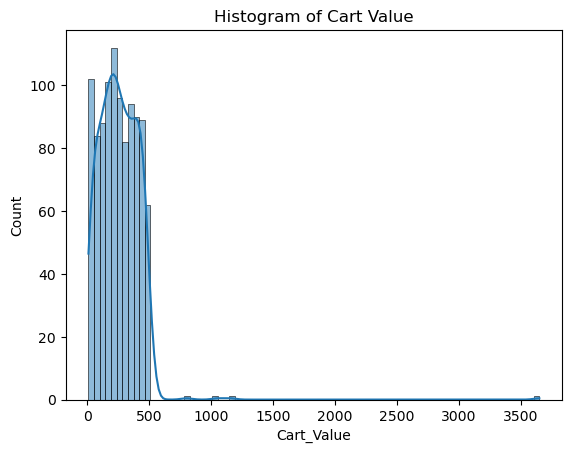

In [ ]:
sns.histplot(df['Cart_Value'], kde=True)
plt.title("Histogram of Cart Value")
plt.show()


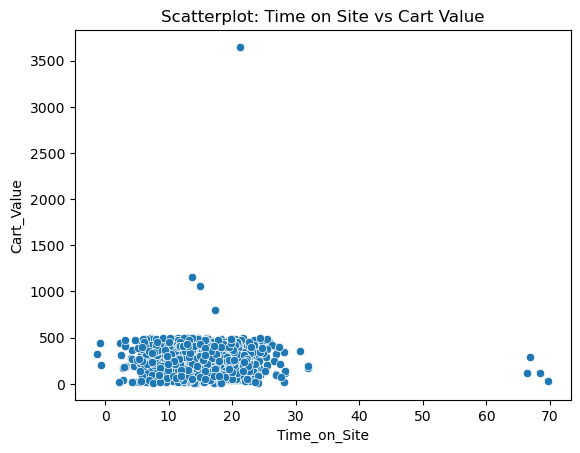

In [ ]:
sns.scatterplot(x='Time_on_Site', y='Cart_Value', data=df)
plt.title("Scatterplot: Time on Site vs Cart Value")
plt.show()

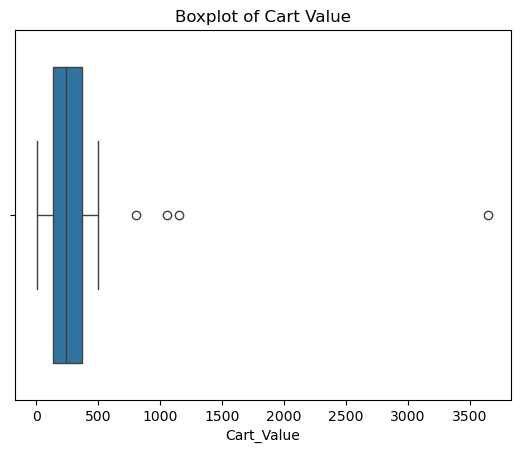

In [ ]:
sns.boxplot(x=df['Cart_Value'])
plt.title("Boxplot of Cart Value")
plt.show()


In [ ]:
def correct_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower, lower, np.where(df[column] > upper, upper, df[column]))

for col in ['Cart_Value', 'Time_on_Site', 'Session_Duration']:
    correct_outliers_iqr(df, col)

df.head()

,User_ID,Age,Gender,Browser,Time_on_Site,Pages_Visited,Session_Duration,Bounce_Rate,Device_Type,Country,Referral_Source,Previous_Purchases,Cart_Value,Discount_Applied,Ad_Clicked,Membership_Status,Preferred_Payment_Method,Purchase_Made,Time_of_Day,Feedback_Score
0,3.0,39.0,0,1,11.07,11,555.125,74.25,1,1,1,0,36.66,1,0,1,1,1,2,1
1,4.0,39.0,0,3,21.22,7,462.000,58.15,0,0,2,8,358.85,1,0,0,2,1,0,2
2,5.0,31.0,1,2,16.84,15,242.000,48.67,2,2,1,4,40.85,0,1,0,0,0,0,4
3,5.0,21.0,1,1,16.12,17,356.000,48.67,0,0,0,1,40.85,1,0,0,1,1,0,4
4,7.0,50.0,0,3,15.37,15,296.000,35.15,1,1,1,2,337.93,1,0,1,0,1,2,2


In [ ]:
print(df.groupby('Gender')['Cart_Value'].mean())

Gender
0    256.378177
1    250.646977
Name: Cart_Value, dtype: float64


In [ ]:
print("Max:", df['Cart_Value'].max())
print("Min:", df['Cart_Value'].min())
print("Mean:", df['Cart_Value'].mean())
print("Sum:", df['Cart_Value'].sum())
print("Unique in Country:", df['Country'].nunique())

Max: 715.925
Min: 10.76
Mean: 253.62103585657368
Sum: 254635.52
Unique in Country: 5


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [ ]:

X = df.drop(columns=['Purchase_Made'])
y = df['Purchase_Made']


In [ ]:

model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X, y)
selected_features_rfe = X.columns[rfe.support_]
print("Top 10 features by RFE:\n", selected_features_rfe)

C:\Users\HARITHA S\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HARITHA S\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

Top 10 features by RFE:
 Index(['Gender', 'Browser', 'Device_Type', 'Country', 'Referral_Source',
       'Previous_Purchases', 'Discount_Applied', 'Ad_Clicked',
       'Membership_Status', 'Time_of_Day'],
      dtype='object')


In [ ]:
X_selected = X[selected_features_rfe]

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test_scaled)
a=pd.DataFrame(y_pred)
a.head()

,0
0,1
1,1
2,1
3,0
4,0


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5472636815920398
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.56      0.55       100
           1       0.55      0.53      0.54       101

    accuracy                           0.55       201
   macro avg       0.55      0.55      0.55       201
weighted avg       0.55      0.55      0.55       201

